In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [53]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [10]:
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mode()[0])

In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df.to_csv("HousingData_cleaned.csv", index=False)

In [14]:
df = pd.read_csv("HousingData_cleaned.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [16]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

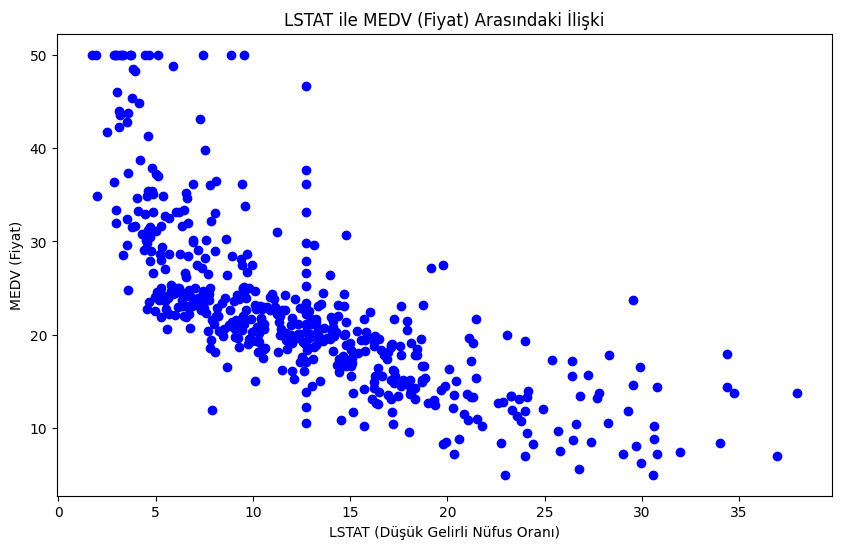

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(df['LSTAT'], df['MEDV'], color='blue')
plt.title('LSTAT ile MEDV (Fiyat) Arasındaki İlişki')
plt.xlabel('LSTAT (Düşük Gelirli Nüfus Oranı)')
plt.ylabel('MEDV (Fiyat)')
plt.show()

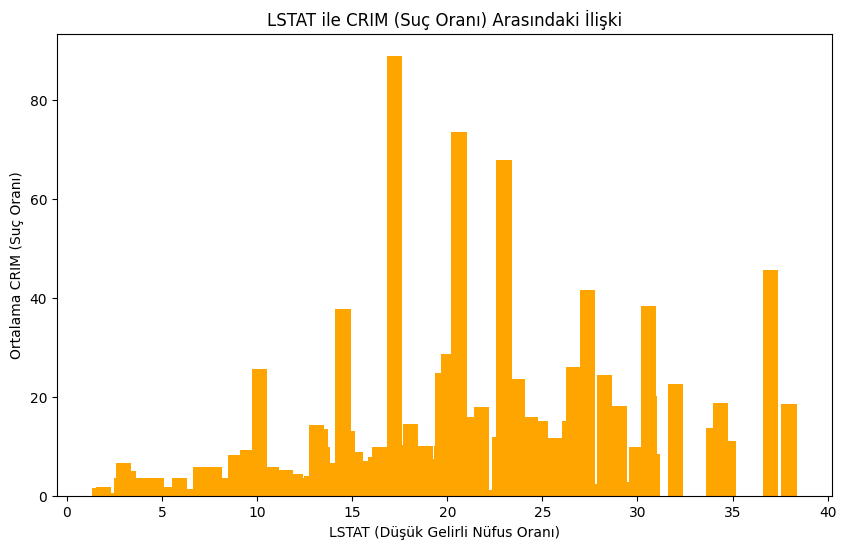

In [52]:
lstat_crim_mean = df.groupby('LSTAT')['CRIM'].mean()
plt.figure(figsize=(10, 6))
plt.bar(lstat_crim_mean.index, lstat_crim_mean, color='orange')
plt.title('LSTAT ile CRIM (Suç Oranı) Arasındaki İlişki')
plt.xlabel('LSTAT (Düşük Gelirli Nüfus Oranı)')
plt.ylabel('Ortalama CRIM (Suç Oranı)')
plt.show()   